# Modülleri import etmek

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math as m
import pandas as pd

In [2]:
#Görselleştirme için renk ayarı

class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLNE = '\033[4m'
    END = '\033[0m'

# Verinin Öyküsü

Şimdi pazar segmentasyonunun bir örneğini ele alacağız. Piyasadaki müşteri türlerini özelliklere göre analiz etmeye çalışacağız.Veri seti 30 örneklemden oluşmakta ve özellikleri sırasıyla memnuniyet ve bağlılıktır. Yani basitçe söylemek gerekirse elimizdeki müşteri verileriyle , müşterileri memnuniyet ve bağlılıklarına göre kümelendireceğiz.

In [3]:
data = pd.read_csv('segmentasyon.csv')

In [4]:
data

,Memnuniyet,Bağlılık
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


In [5]:
X = data.values
X

array([[ 4.  , -1.33],
       [ 6.  , -0.28],
       [ 5.  , -0.99],
       [ 7.  , -0.29],
       [ 4.  ,  1.06],
       [ 1.  , -1.66],
       [10.  , -0.97],
       [ 8.  , -0.32],
       [ 8.  ,  1.02],
       [ 8.  ,  0.68],
       [10.  , -0.34],
       [ 5.  ,  0.39],
       [ 5.  , -1.69],
       [ 2.  ,  0.67],
       [ 7.  ,  0.27],
       [ 9.  ,  1.36],
       [ 8.  ,  1.38],
       [ 7.  ,  1.36],
       [ 7.  , -0.34],
       [ 9.  ,  0.67],
       [10.  ,  1.18],
       [ 3.  , -1.69],
       [ 4.  ,  1.04],
       [ 3.  , -0.96],
       [ 6.  ,  1.03],
       [ 9.  , -0.99],
       [10.  ,  0.37],
       [ 9.  ,  0.03],
       [ 3.  , -1.36],
       [ 5.  ,  0.73]])

In [6]:
def plot_data(X):
    
    plt.figure(figsize=(7.5,6))
    
    for i in range(len(X)):
        
        plt.scatter(X[i][0],X[i][1],color='k')   

# Her işlev fonksiyonunun açıklamaları kod satırlarında paylaşılmıştır.





In [7]:
# Başlangıçta kümeler için centroidler olarak rastgele bir veri noktası atar.

def random_centroid(X,k):

    # k rastgele indeks oluşturma ve bu indekslerdeki veri noktasını centroid olarak kullanma
    random_idx = [np.random.randint(len(X)) for i in range(k)]
    centroids = []
    
    for i in random_idx:
        centroids.append(X[i])
    return centroids

In [8]:
# Hangi noktanın hangi kümeye gideceğini belirler.

def assign_cluster(X,ini_centroids,k):
    
    cluster=[] # Boş bir küme dizini oluşturma
    
    # Her bir gözlem için
    for i in range(len(X)):
        euc_dist=[] # Centroid ve veri noktası arasındaki mesafeyi saklamak için boş bir mesafe dizisi oluşturma
        
        for j in range(k):
            euc_dist.append(np.linalg.norm(np.subtract(X[i],ini_centroids[j]))) # Oluşturulan boş diziye ölçümleri ekleme
        idx=np.argmin(euc_dist) # Ölçümün minimum olduğu mesafeyi döndürme
        cluster.append(idx) # Ölçüme göre ilgili kümeye ekleme
    return np.asarray(cluster)

In [9]:
# Güncellenen centroid noktalarını saklar.

def compute_centroid(X,clusters,k):
    centroid = [] # Centroidleri saklamak için boş dizin oluşturma
    for i in range(k):
        temp_arr=[]
        for j in range(len(X)):
            # Bir kümeyi kontrol etme ve ilgili küme veri noktalarını temp_arr'da saklama
            if clusters[j]==i:
                temp_arr.append(X[j])
        # temp_arr'de saklanan noktalar arasında ortalama alma ve onu centroid dizisinde saklama
        centroid.append(np.mean(temp_arr,axis=0))
    return np.asarray(centroid)

In [10]:
# Önceki centroid ve yeni hesaplanan centroid arasındaki farkı döndürür.

def difference(prev,nxt):
    diff=0
    for i in range(len(prev)):
        diff+=np.linalg.norm(prev[i]-nxt[i])
    return diff

In [11]:
# Görselleştirme

def show_clusters(X,clusters,centroids,ini_centroids,mark_centroid=True,show_ini_centroid=True,show_plots=True):
    
    # Her kümeye belirli bir renk atama 
    
    cols={0:'r',1:'b',2:'g',3:'coral',4:'c',5:'lime'}
    fig,ax=plt.subplots(figsize=(7.5,6));
    
    # Her küme noktası için görselleştirme
    
    for i in range(len(clusters)):
        ax.scatter(X[i][0],X[i][1],color=cols[clusters[i]])
        
    # Centroidleri çizdirme
    for j in range(len(centroids)):
        ax.scatter(centroids[j][0],centroids[j][1],marker='*',color=cols[j])
        if show_ini_centroid==True:
            ax.scatter(ini_centroids[j][0],ini_centroids[j][1],marker="+",s=150,color=cols[j])
            
    # Centroidleri daire içine alma
    if mark_centroid==True:
        for i in range(len(centroids)):
            ax.add_artist(plt.Circle((centroids[i][0],centroids[i][1]),0.4,linewidth=2,fill=False))
            if show_ini_centroid==True:
                ax.add_artist(plt.Circle((ini_centroids[i][0],ini_centroids[i][1]),0.4,linewidth=2,color='y',fill=False))
                
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    ax.set_title("K-means Clustering")
    
    if show_plots==True:
        plt.show()

In [12]:
"""
İlk(Initial) Centroid, + işareti ve sarı daire ile işaretlenmiştir.
Nihai Centroid(Final) * işareti ve siyah daire ile işaretlenmiştir

"""

# Kümeleme performansı

def k_means(X,k,show_type='all',show_plots=True):
    c_prev=random_centroid(X,k) # Başlangıçta rastgele bir centroid atama 
    cluster=assign_cluster(X,c_prev,k) # Veri noktasının küme numarasını saklama 
    diff = 50 # Merkezler arasındaki ilk farkın 100 olduğunu varsayalım
    ini_centroid = c_prev; # İlk centroid değerini c_prev değişkeninde saklama
    
    print(color.BOLD+"NOTE:\n + and Yellow Circle -> Initial Centroid\n * andBlack Circle -> Final Centroid"+color.END)
    
    # Mesafe farkı 0.0001 'e düşerse döngü dursun
    if show_plots:
        print(color.BOLD+"\n\nInitial Plot:\n"+color.END)
        show_clusters(X,cluster,c_prev,ini_centroid,show_plots=show_plots)
    while diff>0.0001:
        cluster = assign_cluster(X,c_prev,k) # Veri noktasını ilgili kümelere atama
        
        # ilk centroid değerlerinin vs gösterildiği ilk grafik
        if show_type=='all' and show_plots:
            show_clusters(X,cluster,c_prev,ini_centroid,False,False,show_plots=show_plots)
            mark_centroid = False 
            show_ini_centroid = False 
        c_new = compute_centroid(X,cluster,k) # Yeni ağırlık merkezi noktasını hesaplamak için fonksiyonu kullanma
        diff = difference(c_prev,c_new) # Merkezler arasındaki farkı hesaplamak için fonksiyon
        c_prev=c_new # Şimdi yeni centroid mevcut centroid noktası olur
        
    # Final
    
    if show_plots:
        print(color.BOLD+"\nInitial Cluster Centers:\n"+color.END)
        print(ini_centroid)
        print(color.BOLD+"\nFinal Cluster Centers:\n"+color.END)
        print(c_prev)
        # Final Kümelemele Grafikleri
        print(color.BOLD+"\n\nFinal Plot:\n"+color.END) 
        show_clusters(X,cluster,c_prev,ini_centroid,mark_centroid=True,show_ini_centroid=True)    
    return cluster,c_prev

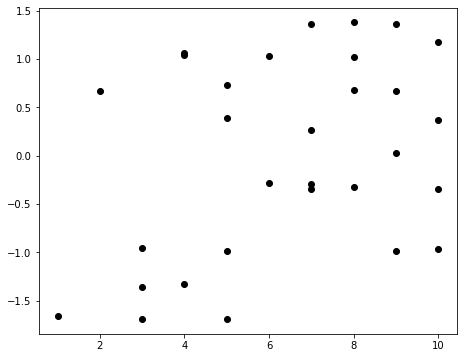

In [89]:
plot_data(X)

NOTE:
 + and Yellow Circle -> Initial Centroid
 * andBlack Circle -> Final Centroid


Initial Plot:



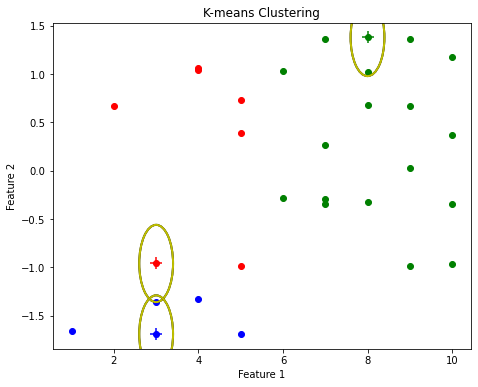


Initial Cluster Centers:

[array([ 3.  , -0.96]), array([ 3.  , -1.69]), array([8.  , 1.38])]

Final Cluster Centers:

[[ 5.          0.42571429]
 [ 3.         -1.14571429]
 [ 8.5         0.316875  ]]


Final Plot:



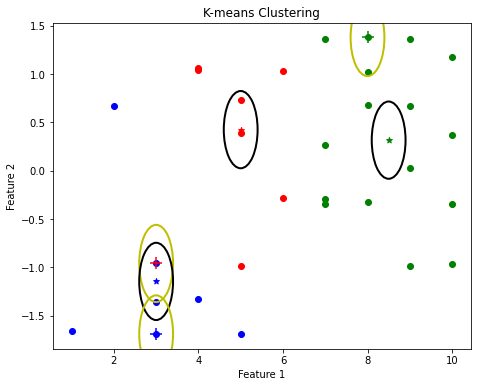

In [92]:
k = 3
cluster,centroid = k_means(X,k,show_type='ini_fin')

# SckitLearn ile KMeans

In [83]:
from sklearn.cluster import KMeans
km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(X)

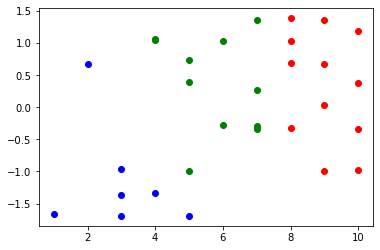

In [84]:
plt.scatter(X[y_km == 0, 0], X[y_km == 0, 1],c='blue')
plt.scatter(X[y_km == 1, 0], X[y_km == 1, 1],c='red')
plt.scatter(X[y_km == 2, 0], X[y_km == 2, 1],c='green')

# Aynı veri kümesi ile DB-Scan Deneyi

In [17]:
import  queue

class dbscan2():
    
    def __init__(self,df, epsilon=1, min_points=5):
        self.df = np.array(df)
        self.epsilon = epsilon
        self.min_points = min_points
        self.cluster_label = 0
        self.noise = 0
        
    def fit(self):
        "Fit the data"
        
        # Tüm noktalar için "-1" değerinde etiket oluşturma
        self.df = np.append(self.df, np.array([[-1]*len(X)]).reshape(-1,1), axis=1)
        
        for x in range(len(self.df)):
            
            # Etiketlenmemiş noktalar için komşu arama
            if self.df[x,2] != -1:
                continue
            
            # Komşu bulma
            p = self.df[x,:2]
            neighbors = self.rangeQuery(p)
            
            # Min_points'ten daha az komşu varsa, gürültü olarak etiketleme
            if len(neighbors) < self.min_points:
                self.df[x,2] = self.noise
                continue
                
            # Küme sayısını başlatma
            self.cluster_label += 1

            
            self.df[x,2] = self.cluster_label

            # Komşuları tutmak için
            found_neighbors = neighbors
            
            # Tüm komşular için küme sayısını bir Queue'de tutma
            q = queue.Queue()
            
            
            for x in neighbors:
                q.put(x)
            
            
            while q.empty() == False:
                
                current = q.get()
                
                # cur_row değişkeni gürültü etiketliyse küme etiketine geçme (sınır noktası)
                if self.df[current,2] == 0:
                    self.df[current,2] = self.cluster_label

                # Etiket -1 değilse devam et
                if self.df[current,2] != -1:
                    continue
                    
                # Komşu etiketi
                self.df[current,2] = self.cluster_label

                # Komşuları ara
                point = self.df[current,:2]
                neighbors2 = self.rangeQuery(point)
                
            
                if len(neighbors2) >= self.min_points:

                    for x in neighbors2:
                        if x not in found_neighbors:
                            q.put(x)
                            found_neighbors.append(x)                           
    
    def predict(self, x):
        
        
        preds = []
        
        for point in x:
            neighbors = self.rangeQuery(point)
            label = self.df[neighbors[0],2]
            preds.append(label)
        
        return preds
    
    def rangeQuery(self, x):
        
        
        neighbors = []
        
        for y in range(len(self.df)):
            q = self.df[y, :2]
            if self.dist(x, q) <= self.epsilon:
                neighbors.append(y)
        
        return neighbors
    
    def dist(self, point1, point2):
        
        x1 = point1[0]
        x2 = point2[0]
        y1 = point1[1]
        y2 = point2[1]
        
        # create the points 
        p1 = (x1 - x2)**2
        p2 = (y1 - y2)**2

        return np.sqrt(p1 + p2)

test = dbscan2(X, 0.1, 0.01)
test.fit()

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass min_samples=0.01 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


<AxesSubplot:title={'center':'Scikit-Learn DBSCAN (eps=0.1, min_points=0.01)'}, xlabel='1', ylabel='0'>

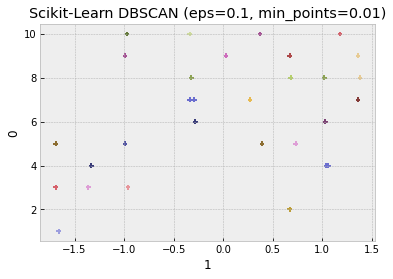

In [130]:
from sklearn.cluster import dbscan

preds = dbscan(X, 0.1, 0.01)[1]
dbscan_blob = np.append(X, preds.reshape(-1,1), axis=1)
pd.DataFrame(dbscan_blob).plot(x=1, y=0, kind="scatter", c=2, colorbar=False, title= "Scikit-Learn DBSCAN (eps=0.1, min_points=0.01)", marker="+", colormap="tab20b")

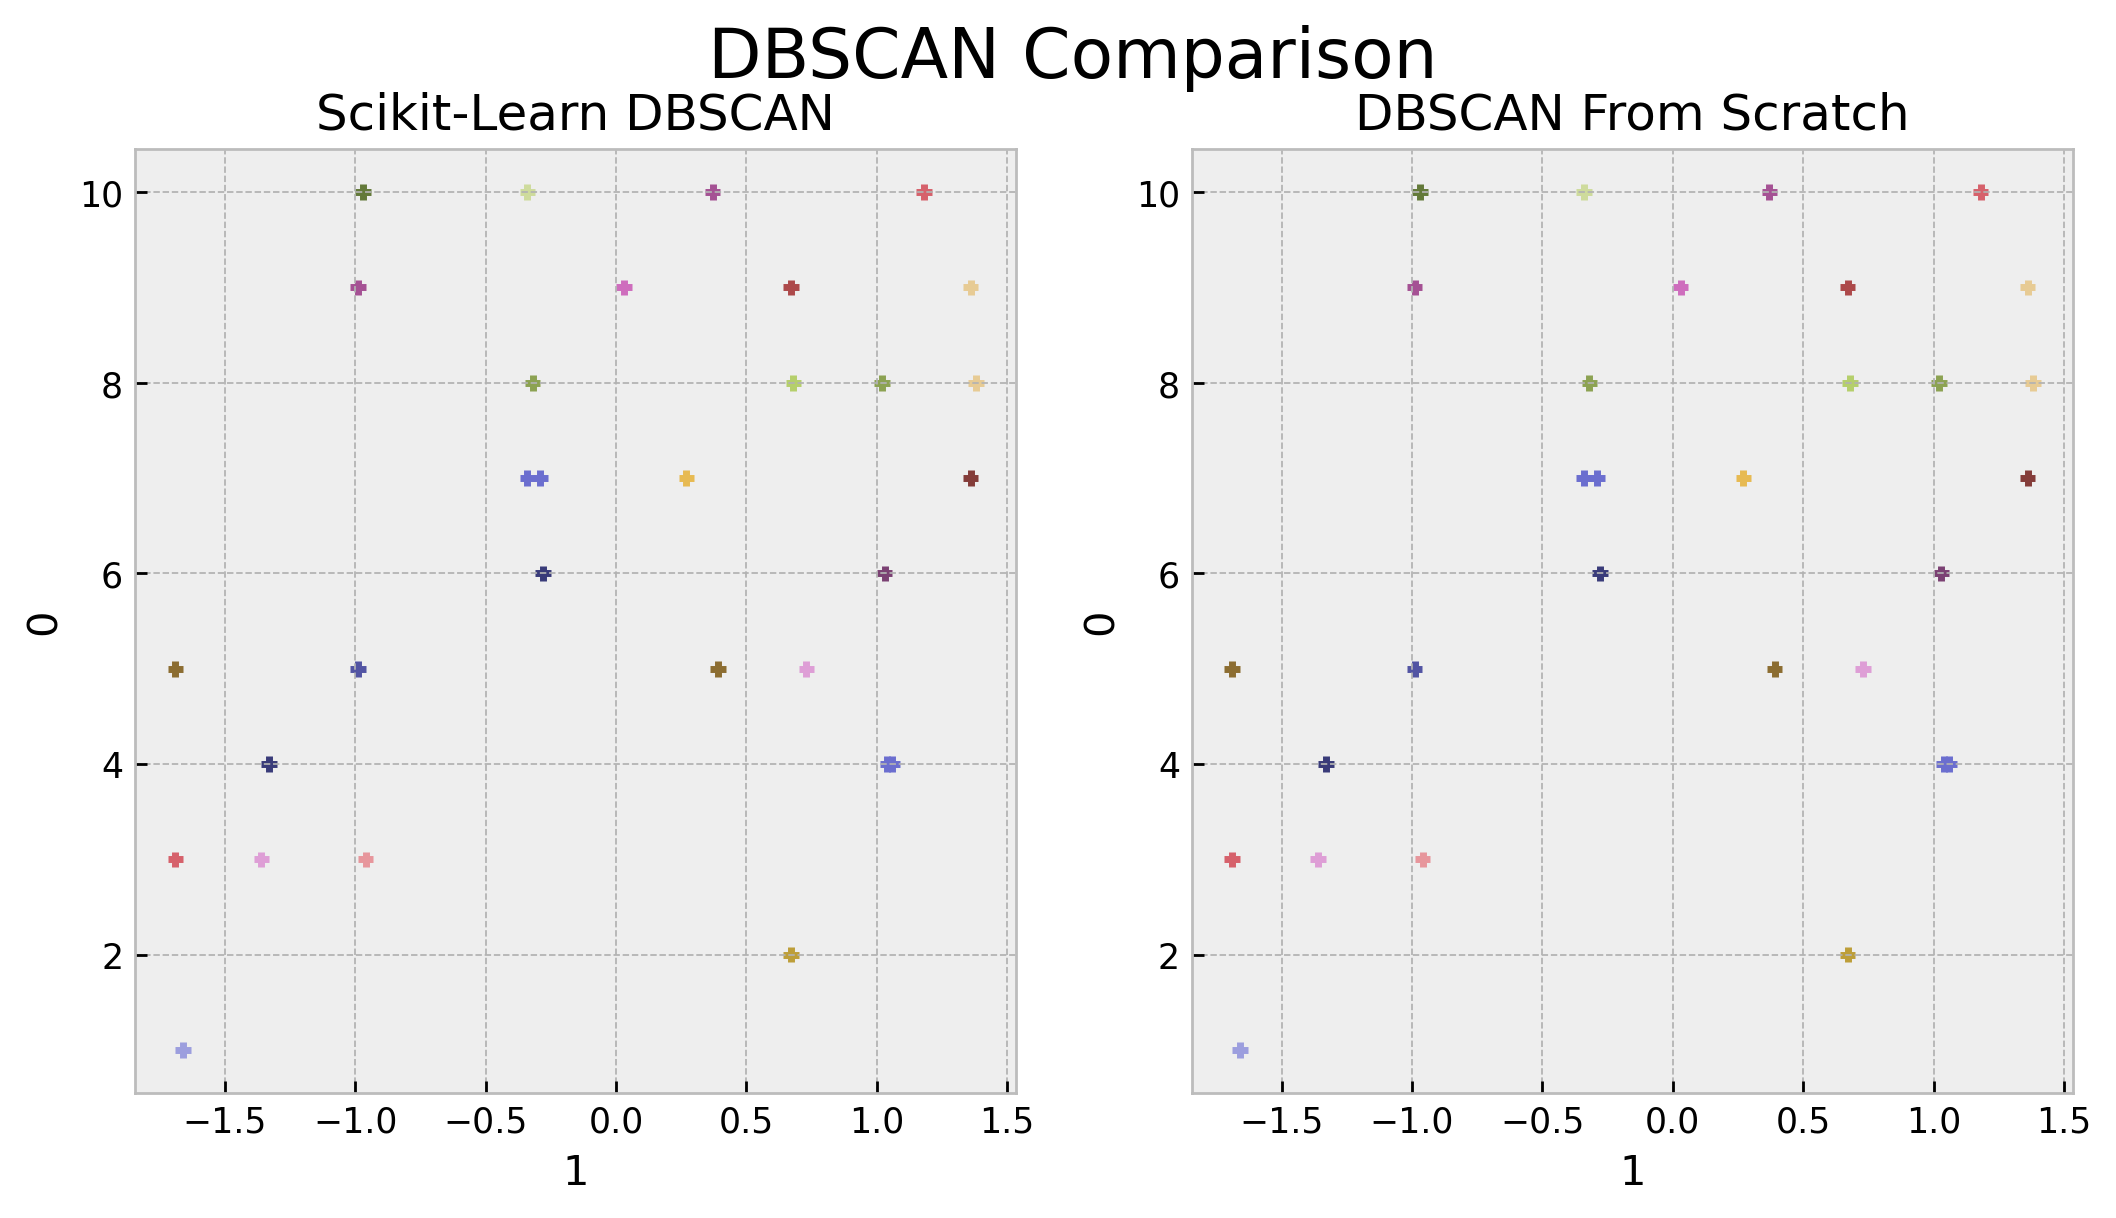

In [131]:
#Plot
plt.style.use("bmh")
fig, ax = plt.subplots(1,2, dpi=250)
fig.suptitle("DBSCAN Comparison", fontsize=20)

pd.DataFrame(test.df).plot(x=1, y=0, kind="scatter",ax=ax[1], c=2, colorbar=False, title= "DBSCAN From Scratch", marker="+", colormap="tab20b")
pd.DataFrame(dbscan_blob).plot(x=1, y=0, kind="scatter",ax=ax[0], c=2, colorbar=False, title= "Scikit-Learn DBSCAN", marker="+", colormap="tab20b", figsize=(10,5))

plt.show()

<AxesSubplot:title={'center':'DBSCAN From Scratch'}, xlabel='1', ylabel='0'>

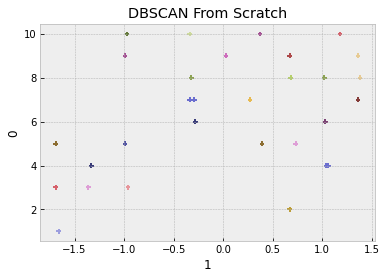

In [135]:
pd.DataFrame(test.df).plot(x=1, y=0, kind="scatter", c=2, colorbar=False, title= "DBSCAN From Scratch", marker="+", colormap="tab20b")

# Normalizasyon Etkisi

Şimdi standartlaştırma yapmamız gerekiyor. Standartlaştırma , bizim daha sağlıklı ve doğru işlemler yapmamızı sağlar. Datamızda gördüğünüz üzere “Memnuniyet” değerleri “Bağlılık” değerlerinden çok daha büyüktür. Bu bizim algoritmamızın “Bağlılık” değerlerini görmezden gelmesine sebep olabilir,bu yüzden “Memnuniyet” değerlerini “Bağlılık” seviyesine indirmemiz gerekiyor.

In [136]:
X

array([[ 4.  , -1.33],
       [ 6.  , -0.28],
       [ 5.  , -0.99],
       [ 7.  , -0.29],
       [ 4.  ,  1.06],
       [ 1.  , -1.66],
       [10.  , -0.97],
       [ 8.  , -0.32],
       [ 8.  ,  1.02],
       [ 8.  ,  0.68],
       [10.  , -0.34],
       [ 5.  ,  0.39],
       [ 5.  , -1.69],
       [ 2.  ,  0.67],
       [ 7.  ,  0.27],
       [ 9.  ,  1.36],
       [ 8.  ,  1.38],
       [ 7.  ,  1.36],
       [ 7.  , -0.34],
       [ 9.  ,  0.67],
       [10.  ,  1.18],
       [ 3.  , -1.69],
       [ 4.  ,  1.04],
       [ 3.  , -0.96],
       [ 6.  ,  1.03],
       [ 9.  , -0.99],
       [10.  ,  0.37],
       [ 9.  ,  0.03],
       [ 3.  , -1.36],
       [ 5.  ,  0.73]])

In [13]:
from sklearn import preprocessing

X_scaled = preprocessing.scale(X)
X_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

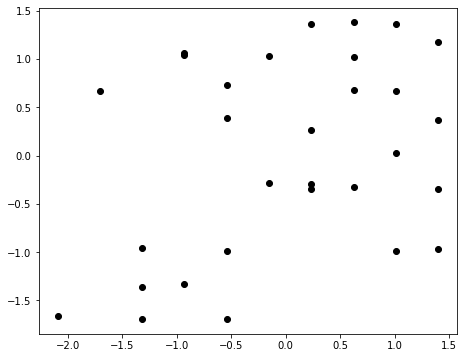

In [14]:
plot_data(X_scaled)

NOTE:
 + and Yellow Circle -> Initial Centroid
 * andBlack Circle -> Final Centroid


Initial Plot:



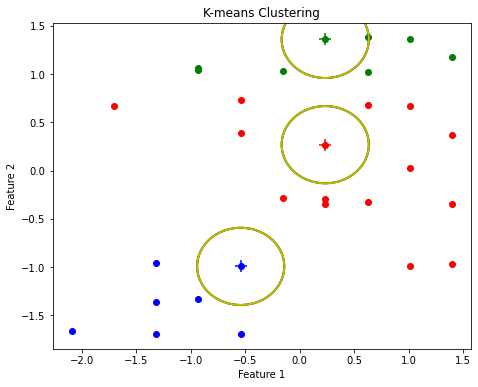


Initial Cluster Centers:

[array([0.23284516, 0.26916393]), array([-0.54330537, -0.99160391]), array([0.23284516, 1.35982816])]

Final Cluster Centers:

[[ 0.7620387  -0.20021284]
 [-1.15313792 -1.38470045]
 [-0.02587168  0.99127037]]


Final Plot:



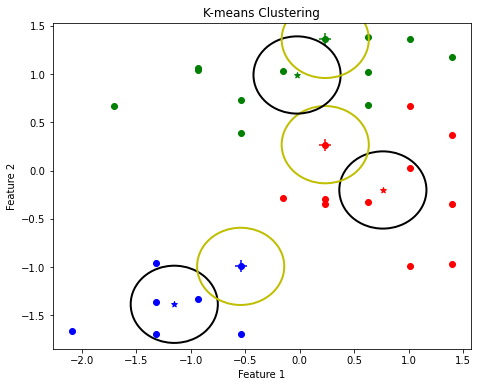

In [16]:
k = 3
cluster1,centroid1 = k_means(X_scaled,k,show_type='ini_fin')

# Ölçeklendirilmiş veri ile SckitLearn K-Means

In [140]:
from sklearn.cluster import KMeans
km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(X_scaled)

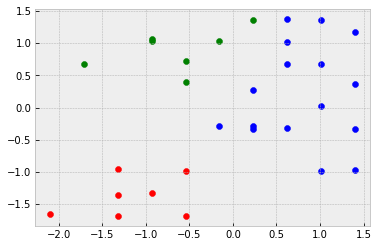

In [141]:
plt.scatter(X_scaled[y_km == 0, 0], X_scaled[y_km == 0, 1],c='blue')
plt.scatter(X_scaled[y_km == 1, 0], X_scaled[y_km == 1, 1],c='red')
plt.scatter(X_scaled[y_km == 2, 0], X_scaled[y_km == 2, 1],c='green')

<function matplotlib.pyplot.show(close=None, block=None)>

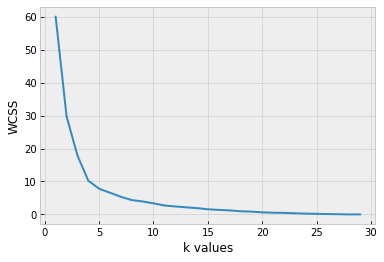

In [144]:
# Elbow Tekniği

wcss = []

for i in range(1,30) : # 30 adet örneklem var
    
    optimal = KMeans(i)
    optimal.fit(X_scaled)
    wcss.append(optimal.inertia_)
    
plt.plot(range(1,30),wcss)
plt.xlabel('k values')
plt.ylabel('WCSS')
plt.show

Dirsek tekniğinden 4 küme ideal gözüküyor.

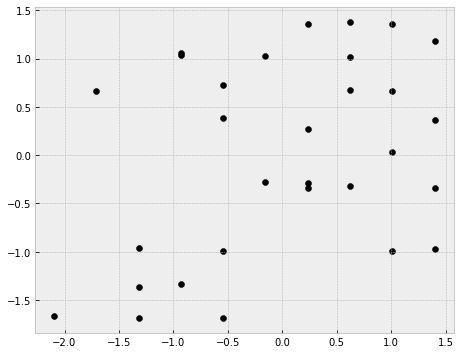

In [138]:
plot_data(X_scaled)

NOTE:
 + and Yellow Circle -> Initial Centroid
 * andBlack Circle -> Final Centroid


Initial Plot:



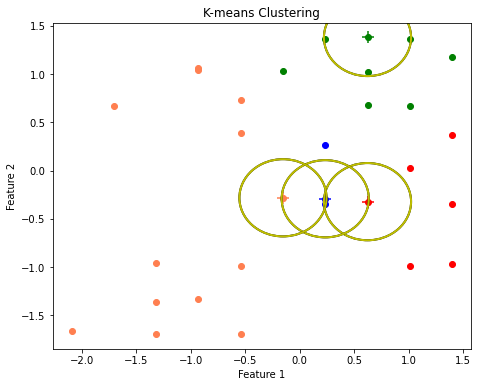


Initial Cluster Centers:

[array([ 0.62092042, -0.32119561]), array([ 0.23284516, -0.29117733]), array([0.62092042, 1.37984035]), array([-0.15523011, -0.28117124])]

Final Cluster Centers:

[[ 0.91197687 -0.3574677 ]
 [-0.59181478  0.6131234 ]
 [ 0.78723839  1.09252251]
 [-1.15313792 -1.38470045]]


Final Plot:



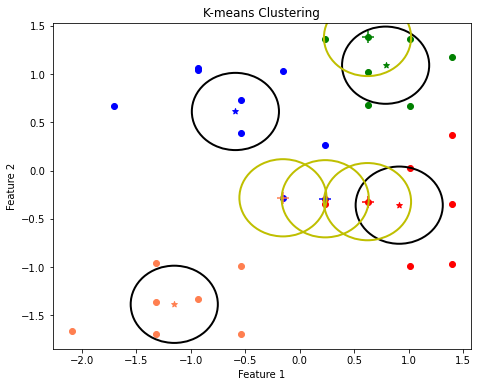

In [15]:
k = 4
cluster,centroid = k_means(X_scaled,k,show_type='ini_fin')

# Ölçeklendirme ile DB-SCAN

In [26]:
test_scaled = dbscan2(X_scaled, 0.5, 2)
test_scaled.fit()

<AxesSubplot:title={'center':'DBSCAN From Scratch'}, xlabel='1', ylabel='0'>

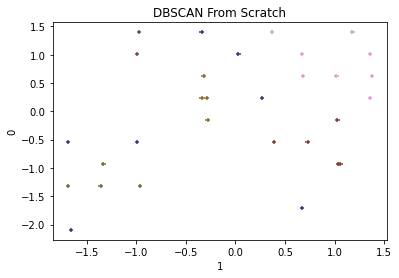

In [27]:
pd.DataFrame(test_scaled.df).plot(x=1, y=0, kind="scatter", c=2, colorbar=False, title= "DBSCAN From Scratch", marker="+", colormap="tab20b")